In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [2]:
df = pd.read_csv('data/train.csv', sep=',', encoding='UTF-8')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df1 = df[df.columns[:29]]
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA


In [5]:
df2 = df[df.columns[29:55]]
df2.head()

,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd
0,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,...,0,1710,1,0,2,1,3,1,Gd,8
1,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,...,0,1262,0,1,2,0,3,1,TA,6
2,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,...,0,1786,1,0,2,1,3,1,Gd,6
3,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,...,0,1717,1,0,1,0,3,1,Gd,7
4,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,...,0,2198,1,0,2,1,4,1,Gd,9


In [6]:
df3 = df[df.columns[55:]]
df3.head()

,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df1['SalePrice'] = df['SalePrice']
df1.head()

C:\Python\Anaconda3-5.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,250000


In [8]:
df1.shape

(1460, 30)

In [9]:
df1.count()

Id              1460
MSSubClass      1460
MSZoning        1460
LotFrontage     1201
LotArea         1460
Street          1460
Alley             91
LotShape        1460
LandContour     1460
Utilities       1460
LotConfig       1460
LandSlope       1460
Neighborhood    1460
Condition1      1460
Condition2      1460
BldgType        1460
HouseStyle      1460
OverallQual     1460
OverallCond     1460
YearBuilt       1460
YearRemodAdd    1460
RoofStyle       1460
RoofMatl        1460
Exterior1st     1460
Exterior2nd     1460
MasVnrType      1452
MasVnrArea      1452
ExterQual       1460
ExterCond       1460
SalePrice       1460
dtype: int64

In [10]:
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
SalePrice          0
dtype: int64

In [11]:
df1.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
SalePrice         int64
dtype: object

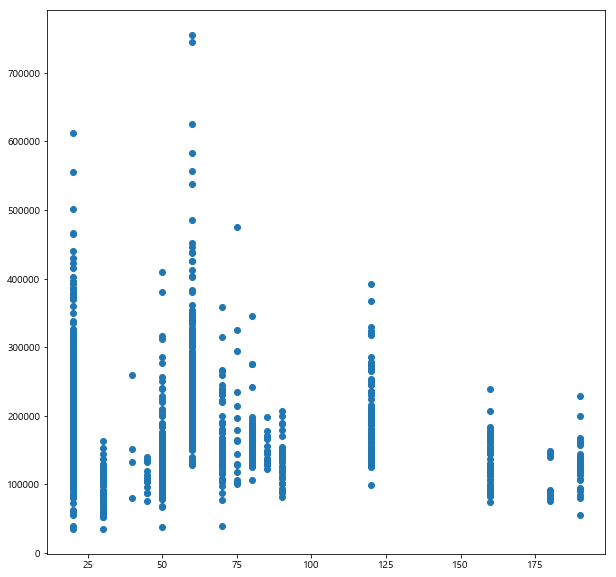

In [12]:
# MSsubClass : 판매 관련 거주 유형 식별

col = 'MSSubClass'
SalePrice = df1[df1.columns[-1]]
plt.figure(figsize=(10,10))
plt.scatter(df1[col], SalePrice)

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: MSZoning, dtype: int64 
NaN : 0


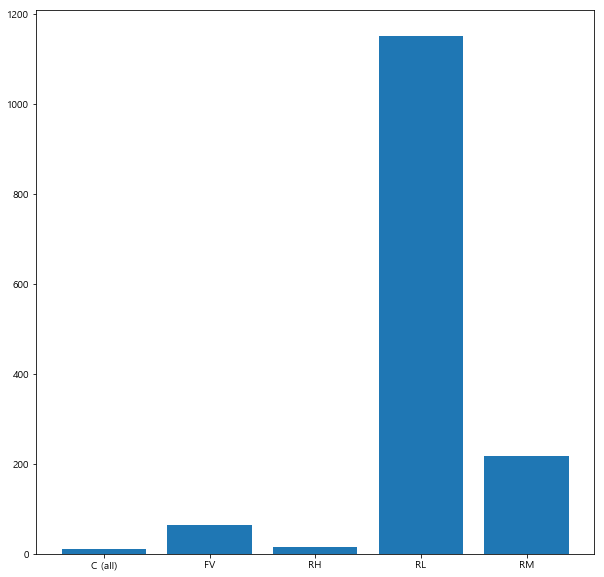

In [13]:
# MSZoning : 판매 관련 구역 분류

col = 'MSZoning'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

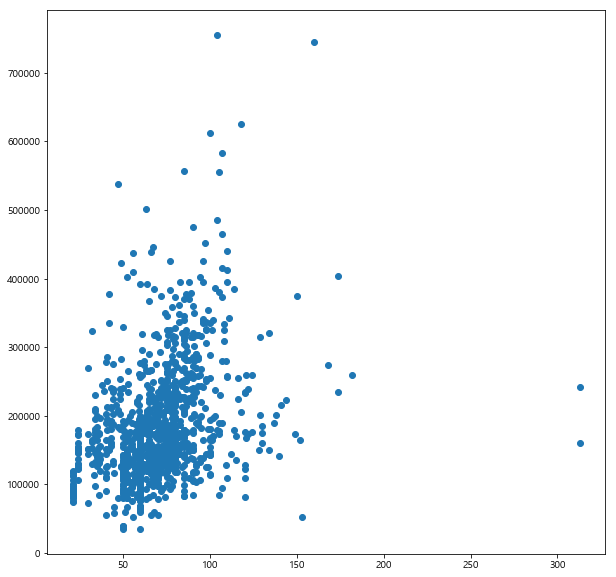

In [14]:
# LotFrontage : 집까지 연결된 거리와의 걸음거리

col = 'LotFrontage'
SalePrice = df1[df1.columns[-1]]
plt.figure(figsize=(10,10))
plt.scatter(df1[col], SalePrice)

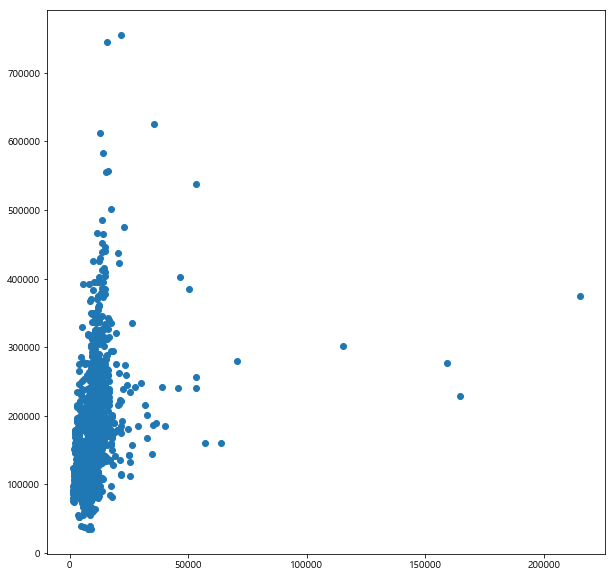

In [15]:
# LotArea : 스퀘어 피트 (면적)

col = 'LotArea'
SalePrice = df1[df1.columns[-1]]
plt.figure(figsize=(10,10))
plt.scatter(df1[col], SalePrice)

Street
Grvl       6
Pave    1454
Name: Street, dtype: int64 
NaN : 0


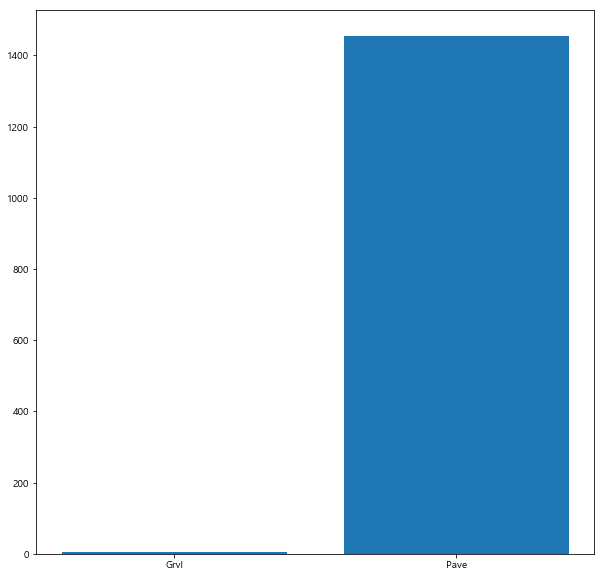

In [16]:
# Street : 도로 접근성

col = 'Street'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64 
NaN : 1369


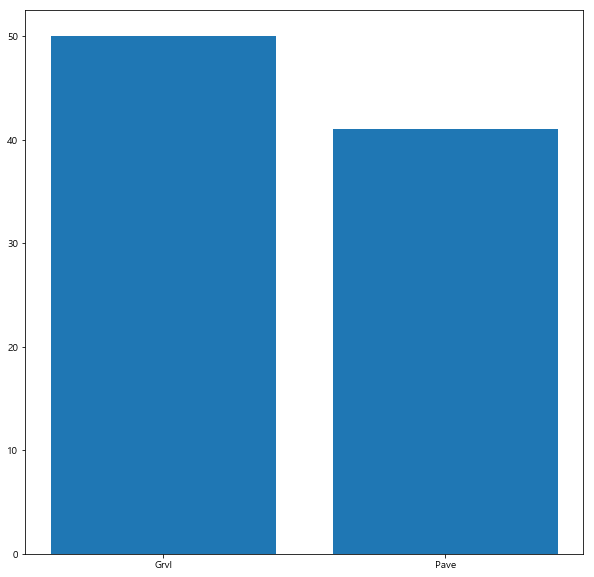

In [17]:
# Alley : 골목길 접근성

col = 'Alley'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: LotShape, dtype: int64 
NaN : 0


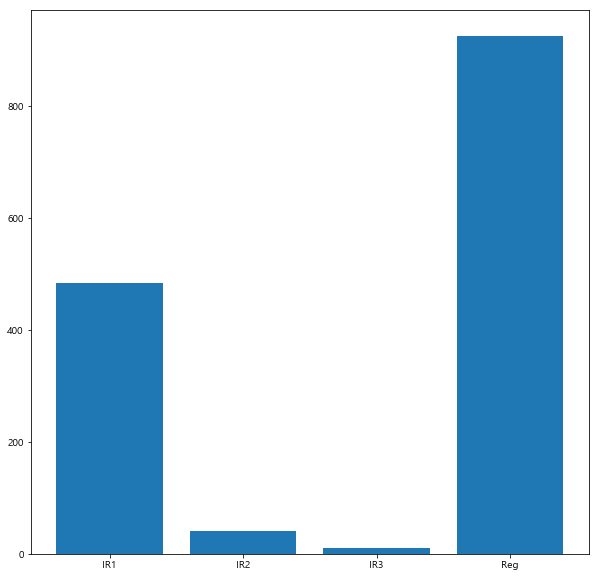

In [18]:
# LotShape :  재산의 일반적 형태

col = 'LotShape'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: LandContour, dtype: int64 
NaN : 0


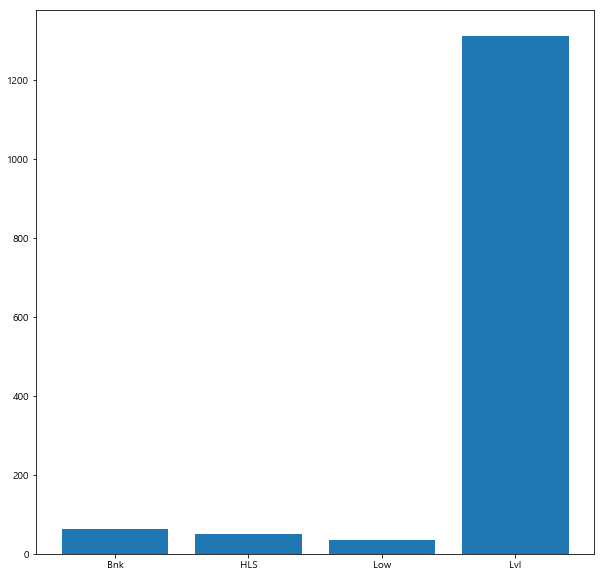

In [19]:
# LandContour : 지대 평탄성

col = 'LandContour'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 
NaN : 0


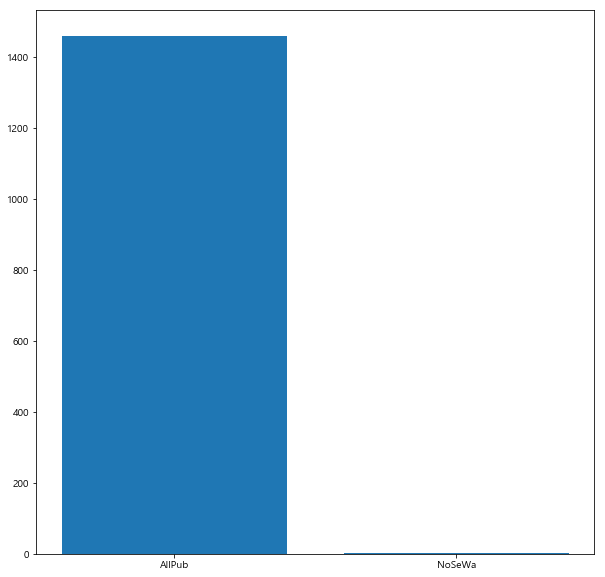

In [20]:
# Utilities : 가용 공공시설

col = 'Utilities'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: LotConfig, dtype: int64 
NaN : 0


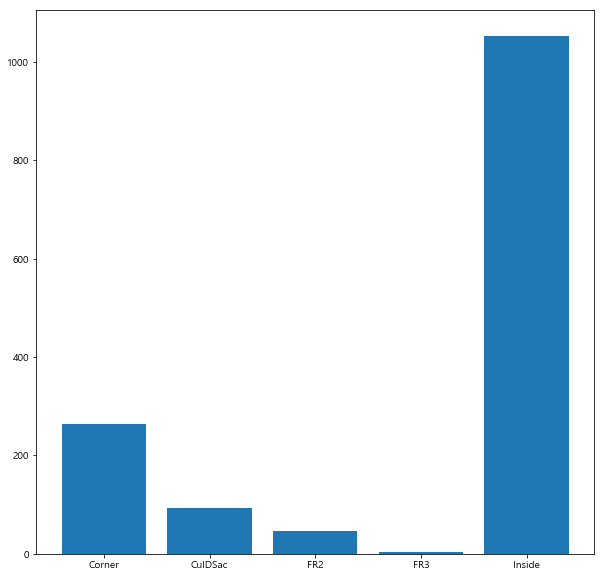

In [21]:
# LotConfig : 대지 구성

col = 'LotConfig'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 
NaN : 0


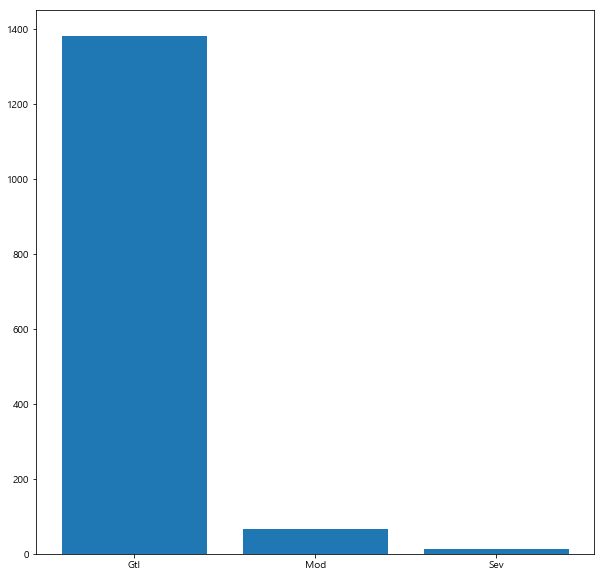

In [22]:
# LandSlope : 경사

col = 'LandSlope'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: Neighborhood, dtype: int64 
NaN : 0


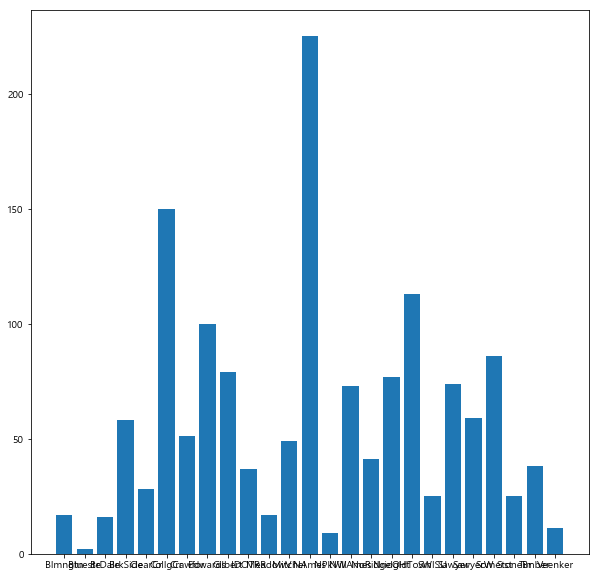

In [23]:
# Neighborhood : Ames city 내 물리적 위치

col = 'Neighborhood'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

Condition1
Artery      48
Feedr       81
Norm      1260
PosA         8
PosN        19
RRAe        11
RRAn        26
RRNe         2
RRNn         5
Name: Condition1, dtype: int64 
NaN : 0


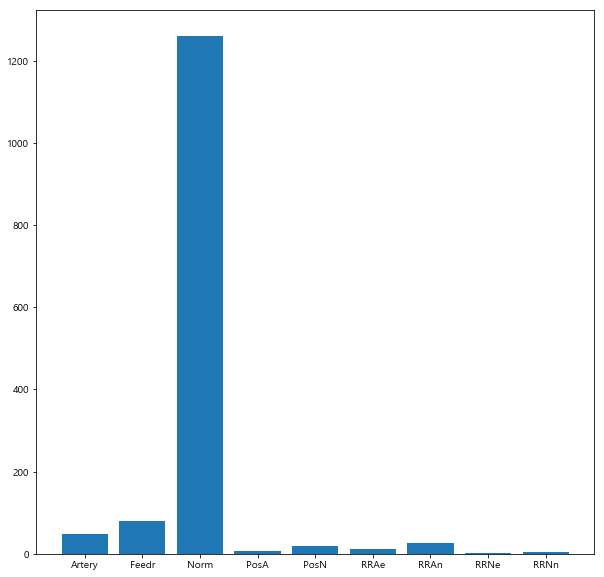

In [24]:
# Condition1 : 조건 접근성 (1개)

col = 'Condition1'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

Condition2
Artery       2
Feedr        6
Norm      1445
PosA         1
PosN         2
RRAe         1
RRAn         1
RRNn         2
Name: Condition2, dtype: int64 
NaN : 0


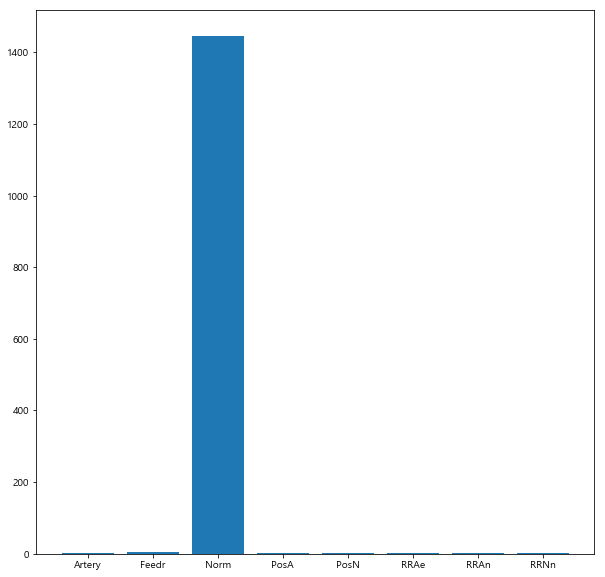

In [25]:
# Condition2 : 조건 접근성 (2개 이상)

col = 'Condition2'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

BldgType
1Fam      1220
2fmCon      31
Duplex      52
Twnhs       43
TwnhsE     114
Name: BldgType, dtype: int64 
NaN : 0


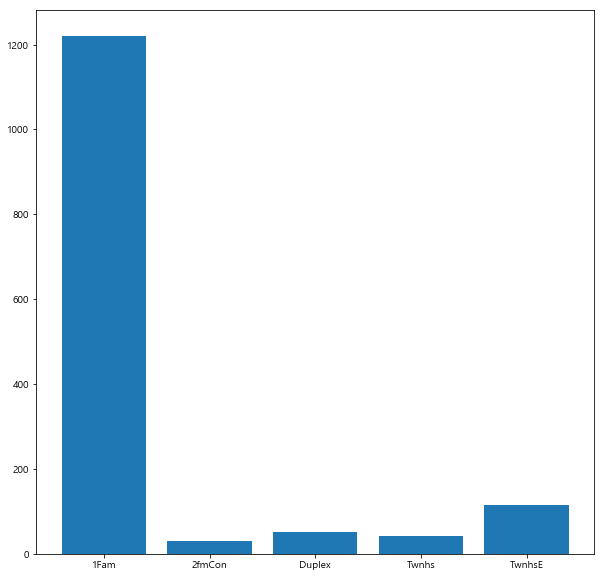

In [26]:
# BldgType : 주거 타입

col = 'BldgType'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

HouseStyle
1.5Fin    154
1.5Unf     14
1Story    726
2.5Fin      8
2.5Unf     11
2Story    445
SFoyer     37
SLvl       65
Name: HouseStyle, dtype: int64 
NaN : 0


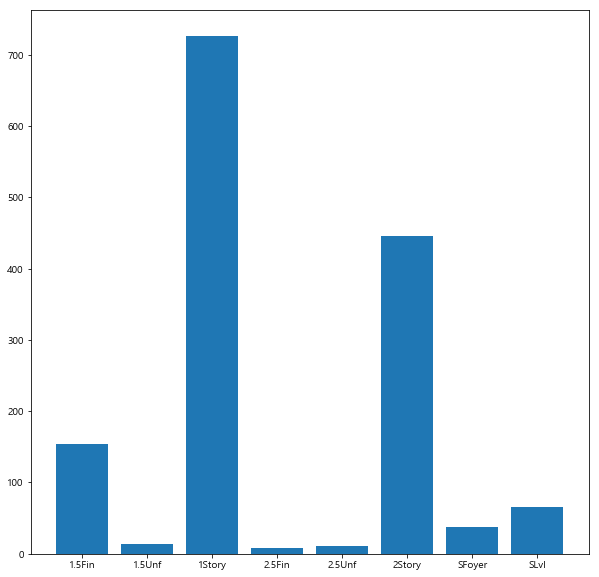

In [27]:
# HouseStyle : 주거 스타일

col = 'HouseStyle'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

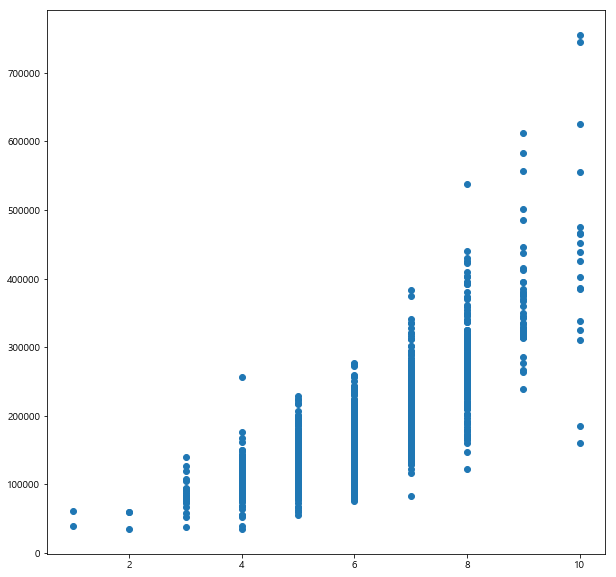

In [28]:
# OverallQual : 집 재료 및 마감 비율

col = 'OverallQual'
SalePrice = df1[df1.columns[-1]]
plt.figure(figsize=(10,10))
plt.scatter(df1[col], SalePrice)

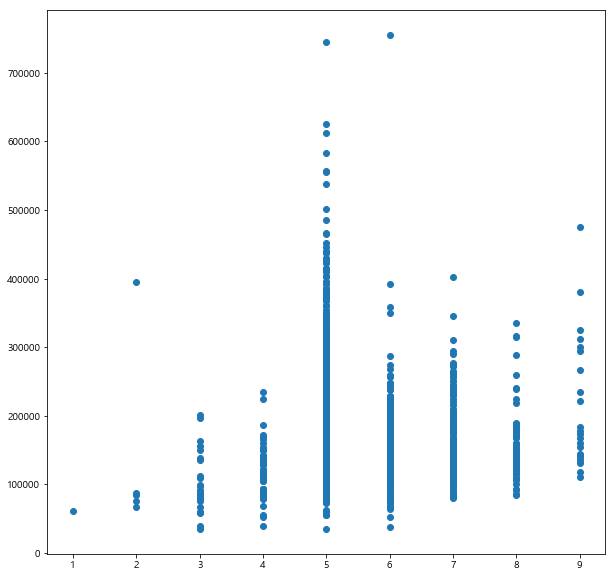

In [29]:
# OverallCond : 집 상태

col = 'OverallCond'
SalePrice = df1[df1.columns[-1]]
plt.figure(figsize=(10,10))
plt.scatter(df1[col], SalePrice)

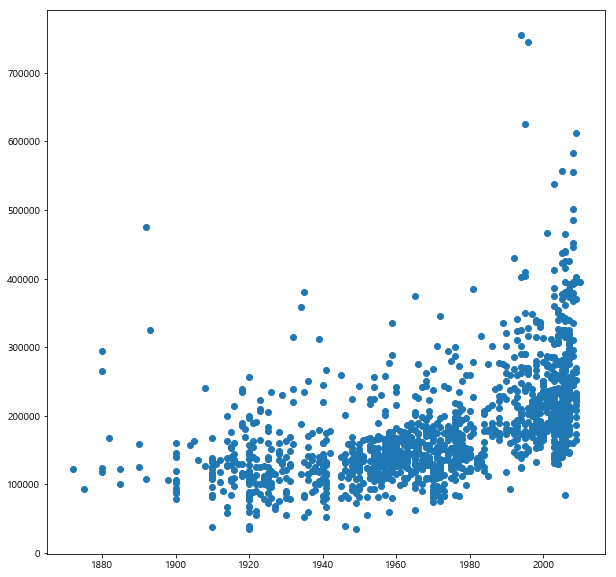

In [30]:
# YearBuilt : 준공연도

col = 'YearBuilt'
SalePrice = df1[df1.columns[-1]]
plt.figure(figsize=(10,10))
plt.scatter(df1[col], SalePrice)

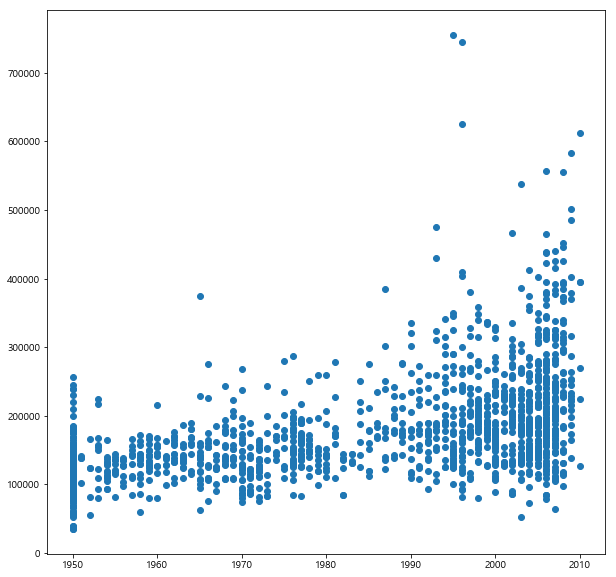

In [31]:
# YearRemodAdd : 리모델링 연도 (리모델링, 추가 준공이 없는 경우는 원 준공연도)

col = 'YearRemodAdd'
SalePrice = df1[df1.columns[-1]]
plt.figure(figsize=(10,10))
plt.scatter(df1[col], SalePrice)

RoofStyle
Flat         13
Gable      1141
Gambrel      11
Hip         286
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64 
NaN : 0


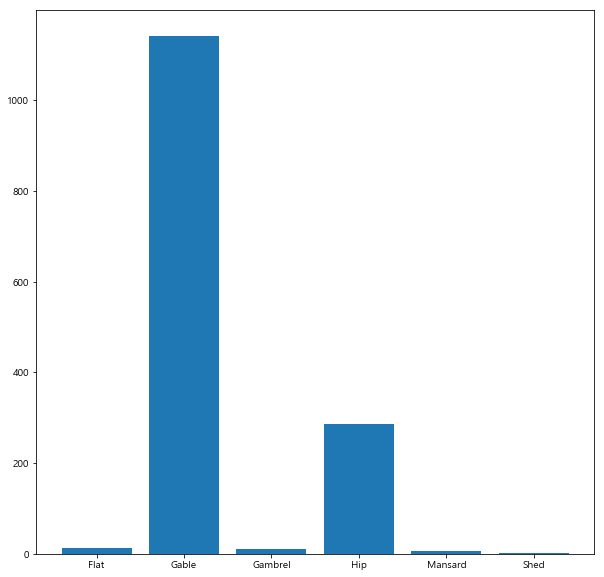

In [32]:
# RoofStyle : 지붕 타입

col = 'RoofStyle'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

RoofMatl
ClyTile       1
CompShg    1434
Membran       1
Metal         1
Roll          1
Tar&Grv      11
WdShake       5
WdShngl       6
Name: RoofMatl, dtype: int64 
NaN : 0


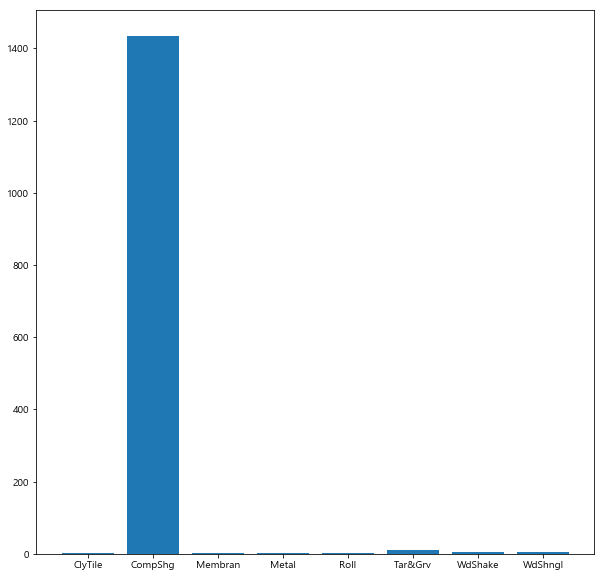

In [33]:
# RoofMatl : 지붕 재질

col = 'RoofMatl'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

Exterior1st
AsbShng     20
AsphShn      1
BrkComm      2
BrkFace     50
CBlock       1
CemntBd     61
HdBoard    222
ImStucc      1
MetalSd    220
Plywood    108
Stone        2
Stucco      25
VinylSd    515
Wd Sdng    206
WdShing     26
Name: Exterior1st, dtype: int64 
NaN : 0


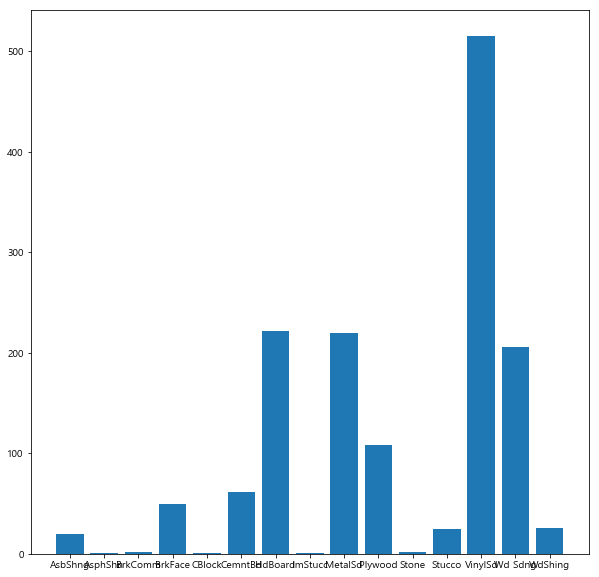

In [34]:
# Exterior1st : 주 외장재

col = 'Exterior1st'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

Exterior2nd
AsbShng     20
AsphShn      3
Brk Cmn      7
BrkFace     25
CBlock       1
CmentBd     60
HdBoard    207
ImStucc     10
MetalSd    214
Other        1
Plywood    142
Stone        5
Stucco      26
VinylSd    504
Wd Sdng    197
Wd Shng     38
Name: Exterior2nd, dtype: int64 
NaN : 0


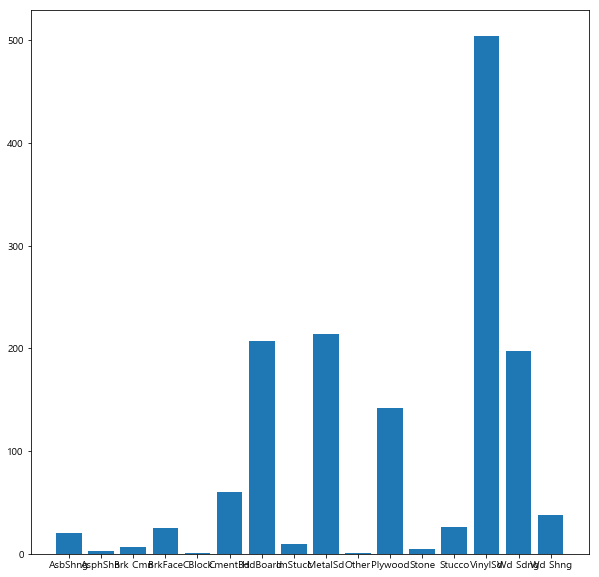

In [35]:
# Exterior2nd : 부 외장재

col = 'Exterior2nd'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

MasVnrType
BrkCmn      15
BrkFace    445
None       864
Stone      128
Name: MasVnrType, dtype: int64 
NaN : 8


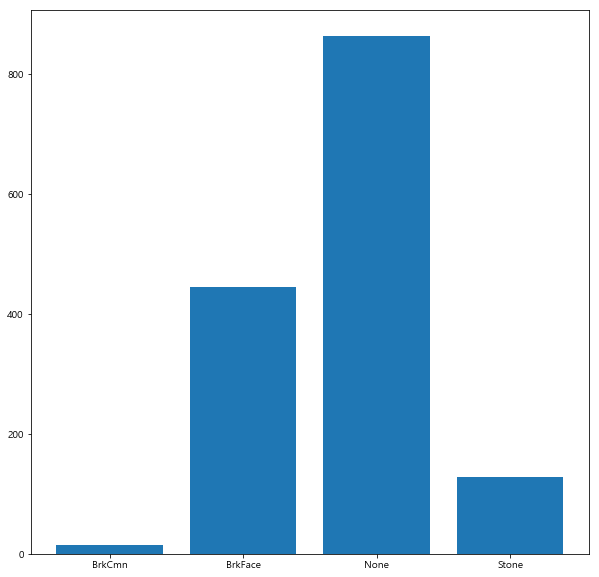

In [36]:
# MasVnrType : 벽돌장식 타입

col = 'MasVnrType'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

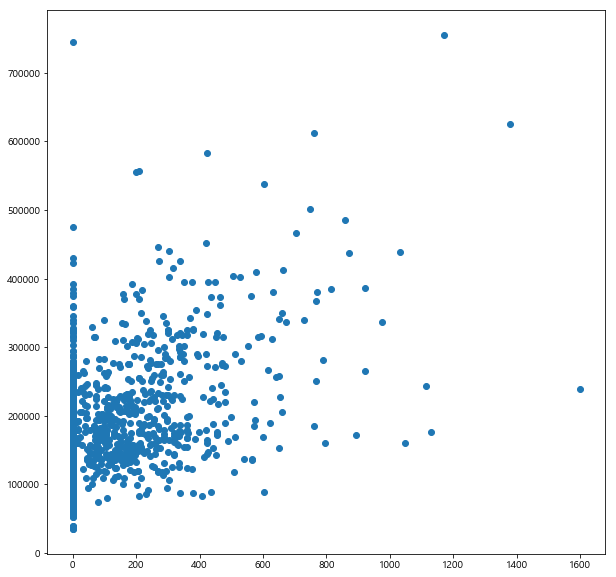

In [37]:
# MasVnrArea : 벽돌장식 면적

col = 'MasVnrArea'
SalePrice = df1[df1.columns[-1]]
plt.figure(figsize=(10,10))
plt.scatter(df1[col], SalePrice)

ExterQual
Ex     52
Fa     14
Gd    488
TA    906
Name: ExterQual, dtype: int64 
NaN : 0


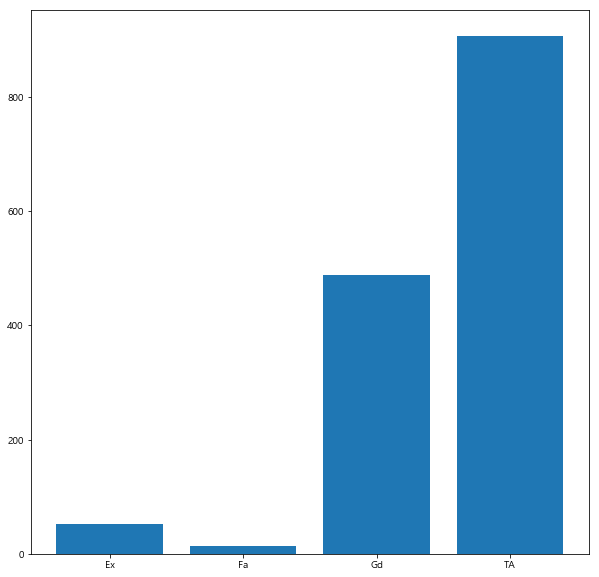

In [38]:
# ExterQual : 외장재 품질 평가

col = 'ExterQual'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)

ExterCond
Ex       3
Fa      28
Gd     146
Po       1
TA    1282
Name: ExterCond, dtype: int64 
NaN : 0


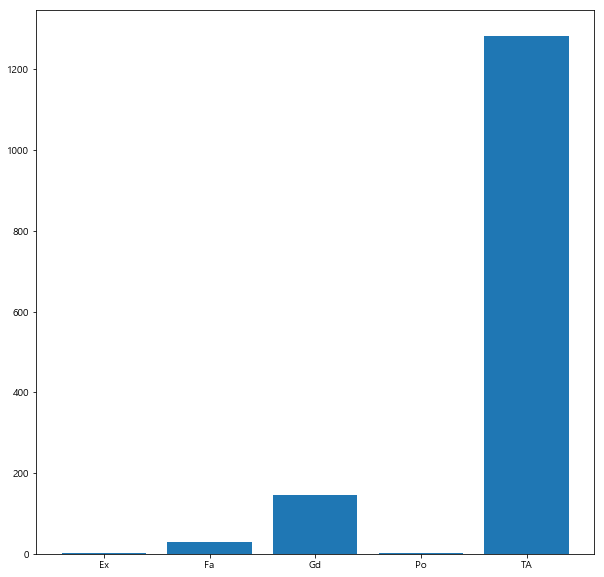

In [39]:
# ExterCond : 외장재 상태

col = 'ExterCond'
count = df1[col].groupby(df1[col]).count()
NaN = df1[col].isnull().sum()
index = count.keys()
plt.figure(figsize=(10,10))
plt.bar(range(len(count)), count.values)
plt.xticks(range(len(count)), index)
plt.show
print(count, '\nNaN :', NaN)